In [241]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import random

In [242]:
# 데이터 로드
url = "https://raw.githubusercontent.com/MyungKyuYi/AI-class/main/BP_data.csv"
data  = pd.read_csv(url)
data

,Patient_Number,Blood_Pressure_Abnormality,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient,Age,BMI,Sex,Pregnancy,Smoking,Physical_activity,salt_content_in_the_diet,alcohol_consumption_per_day,Level_of_Stress,Chronic_kidney_disease,Adrenal_and_thyroid_disorders
0,1,1,11.28,0.90,34,23,1,1.0,0,45961,48071,NaN,2,1,1
1,2,0,9.75,0.23,54,33,1,NaN,0,26106,25333,205.0,3,0,0
2,3,1,10.79,0.91,70,49,0,NaN,0,9995,29465,67.0,2,1,0
3,4,0,11.00,0.43,71,50,0,NaN,0,10635,7439,242.0,1,1,0
4,5,1,14.17,0.83,52,19,0,NaN,0,15619,49644,397.0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1996,1,10.14,0.02,69,26,1,NaN,1,26118,47568,144.0,3,1,0
1996,1997,1,11.77,1.00,24,45,1,1.0,1,2572,8063,NaN,3,1,1
1997,1998,1,16.91,0.22,18,42,0,NaN,0,14933,24753,NaN,2,1,1
1998,1999,0,11.15,0.72,46,45,1,NaN,1,18157,15275,253.0,3,0,1


In [243]:
data.columns

Index(['Patient_Number', 'Blood_Pressure_Abnormality', 'Level_of_Hemoglobin',
       'Genetic_Pedigree_Coefficient', 'Age', 'BMI', 'Sex', 'Pregnancy',
       'Smoking', 'Physical_activity', 'salt_content_in_the_diet',
       'alcohol_consumption_per_day', 'Level_of_Stress',
       'Chronic_kidney_disease', 'Adrenal_and_thyroid_disorders'],
      dtype='object')

In [244]:
data.isnull().sum()

,0
Patient_Number,0
Blood_Pressure_Abnormality,0
Level_of_Hemoglobin,0
Genetic_Pedigree_Coefficient,92
Age,0
BMI,0
Sex,0
Pregnancy,1558
Smoking,0
Physical_activity,0


In [245]:
zero_fill_cols = ['Pregnancy', 'Smoking', 'Physical_activity', 'alcohol_consumption_per_day']
mean_fill_cols = [col for col in data.columns if col not in zero_fill_cols + ['Patient_Number', 'Blood_Pressure_Abnormality']]

In [246]:
# 0으로 채우기
for col in zero_fill_cols:
    data[col] = data[col].fillna(0)

In [247]:
# 평균으로 채우기
for col in mean_fill_cols:
    data[col] = data[col].fillna(data[col].mean())

In [248]:
# 데이터와 타겟 분리
X = data.drop(['Patient_Number', 'Blood_Pressure_Abnormality'], axis=1).values
y = data['Blood_Pressure_Abnormality'].values

In [249]:
data['Blood_Pressure_Abnormality'].value_counts()

,count
Blood_Pressure_Abnormality,
0,1013
1,987


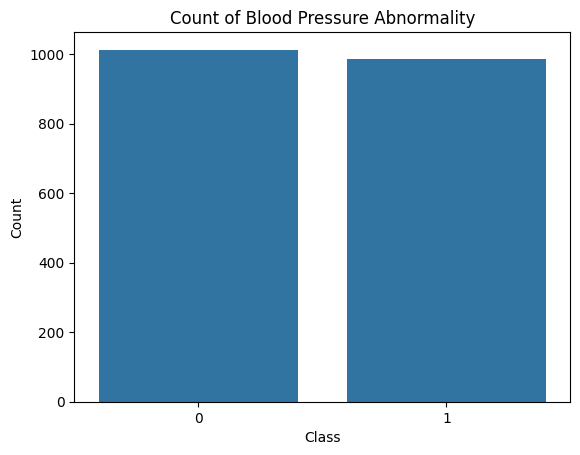

In [250]:
import seaborn as sns

sns.countplot(x=data['Blood_Pressure_Abnormality'])
plt.title('Count of Blood Pressure Abnormality')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

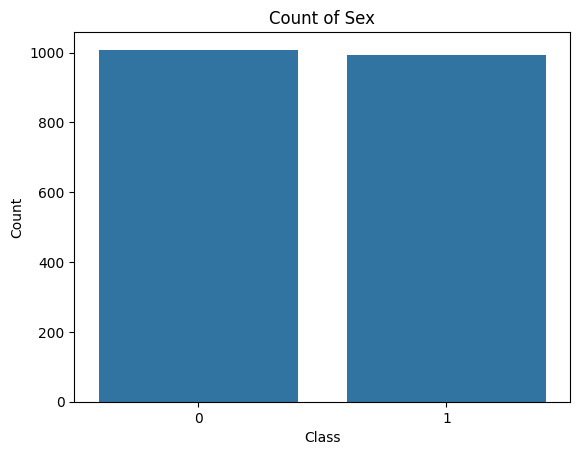

In [251]:
import seaborn as sns

sns.countplot(x=data['Sex'])
plt.title('Count of Sex')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

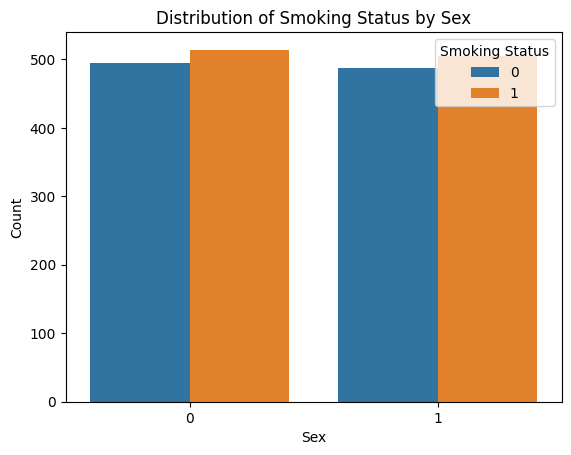

In [252]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Sex', hue='Smoking', data=data)
plt.title('Distribution of Smoking Status by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(title='Smoking Status')
plt.show()

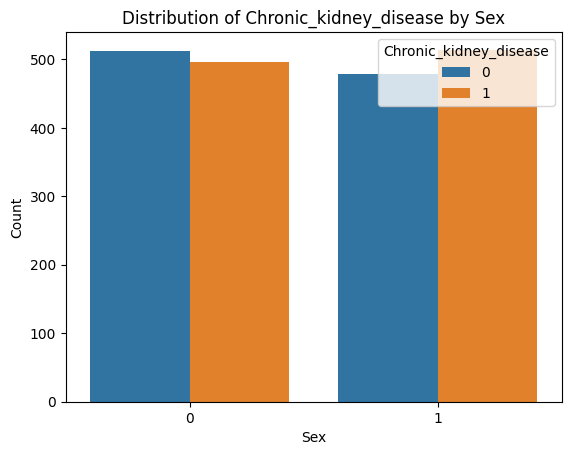

In [253]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Sex', hue='Chronic_kidney_disease', data=data)
plt.title('Distribution of Chronic_kidney_disease by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(title='Chronic_kidney_disease')
plt.show()

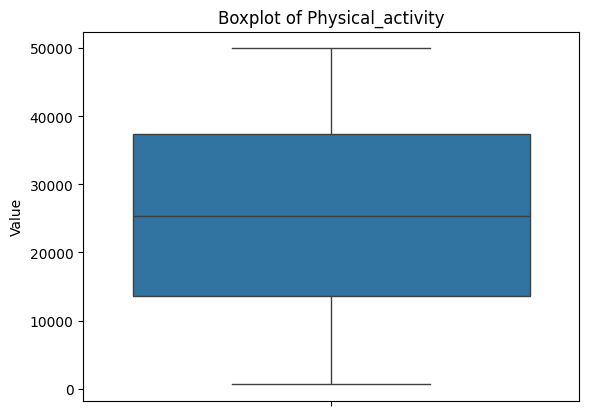

In [254]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(y=data['Physical_activity'])
plt.title('Boxplot of Physical_activity')
plt.ylabel('Value')
plt.show()

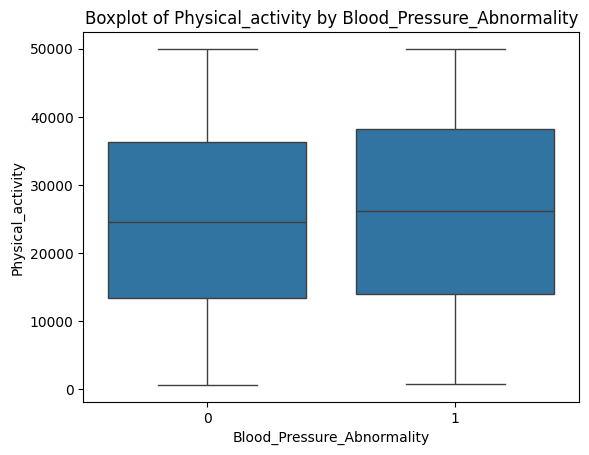

In [255]:
import seaborn as sns
import matplotlib.pyplot as plt

# x: 범주형 라벨 (예: 'Sex'), y: 연속형 값 (예: 'BloodPressure')
sns.boxplot(x='Blood_Pressure_Abnormality', y='Physical_activity', data=data)
plt.title('Boxplot of Physical_activity by Blood_Pressure_Abnormality')
plt.xlabel('Blood_Pressure_Abnormality')
plt.ylabel('Physical_activity')
plt.show()

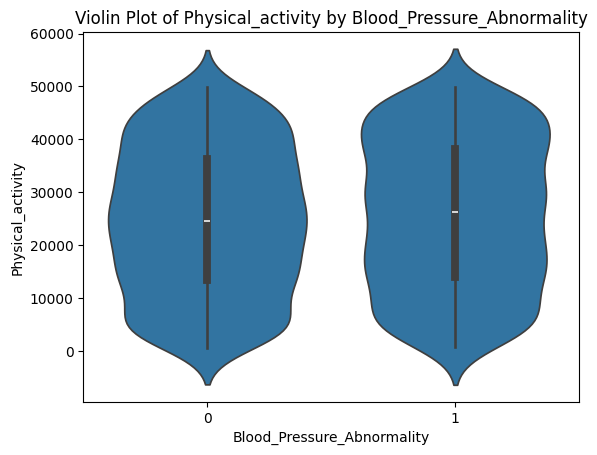

In [256]:
import seaborn as sns
import matplotlib.pyplot as plt

# x: 범주형 컬럼, y: 연속형 컬럼
sns.violinplot(x='Blood_Pressure_Abnormality', y='Physical_activity', data=data)

plt.title('Violin Plot of Physical_activity by Blood_Pressure_Abnormality')
plt.xlabel('Blood_Pressure_Abnormality')
plt.ylabel('Physical_activity')
plt.show()


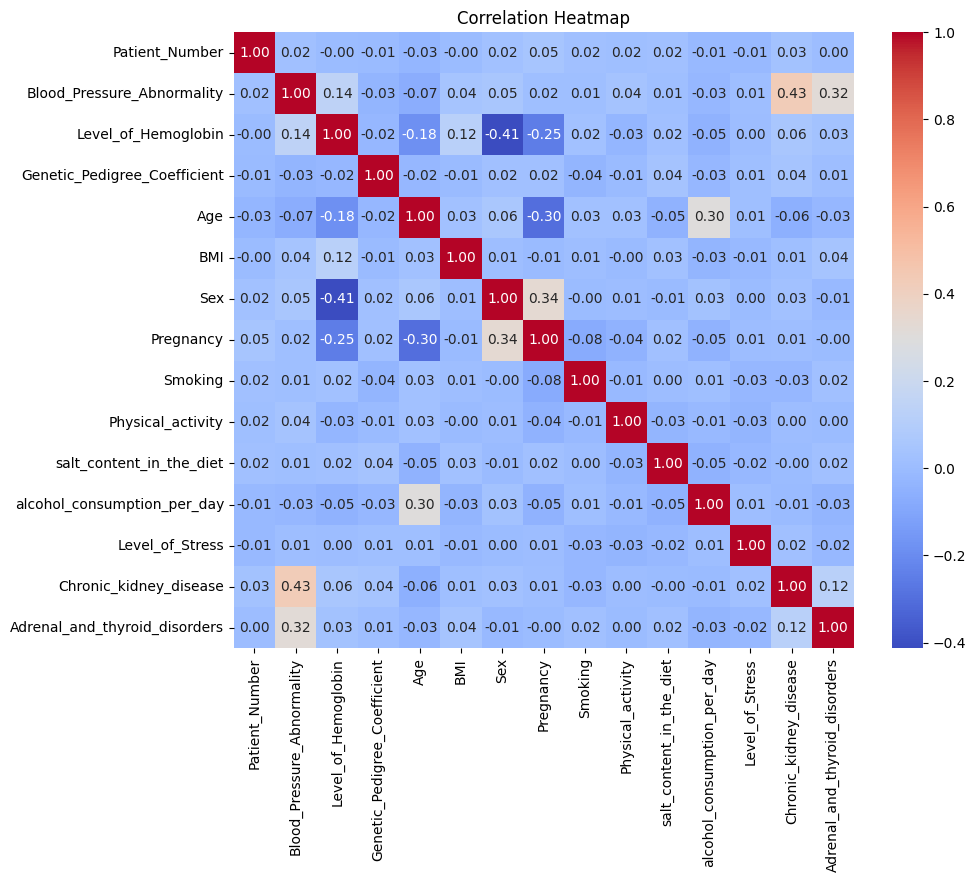

In [257]:
import seaborn as sns
import matplotlib.pyplot as plt

# 상관계수 계산
corr = data.corr()

# 히트맵 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


### 상관 관계 : 0.3 이상이면 어느정도 상관이 있다.

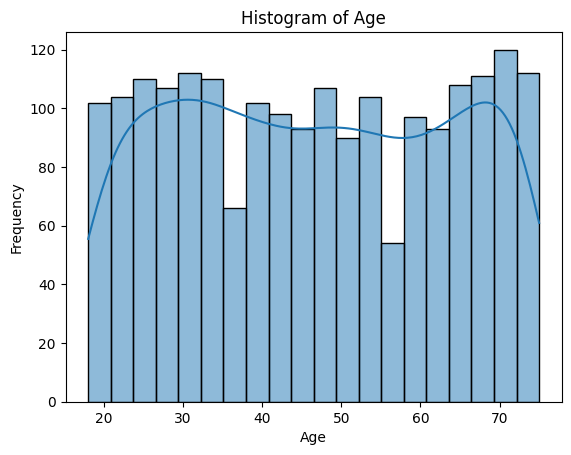

In [258]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data['Age'], kde=True, bins=20)

plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


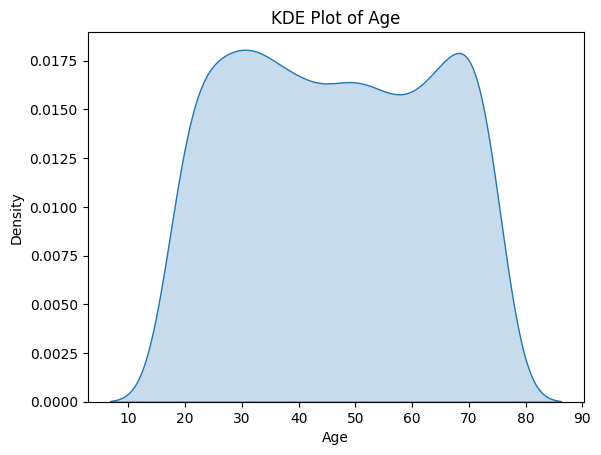

In [259]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.kdeplot(data['Age'].dropna(), fill=True)

plt.title('KDE Plot of Age')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()


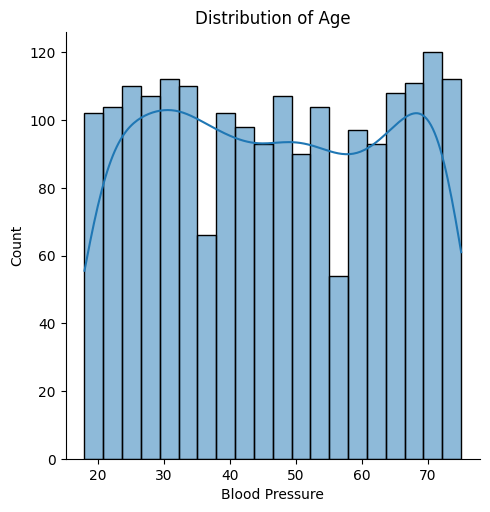

In [260]:
import seaborn as sns
import matplotlib.pyplot as plt

# BloodPressure 컬럼의 분포 시각화 (히스토그램 + KDE)
sns.displot(data['Age'].dropna(), kde=True, bins=20)

plt.title('Distribution of Age')
plt.xlabel('Blood Pressure')
plt.ylabel('Count')
plt.show()


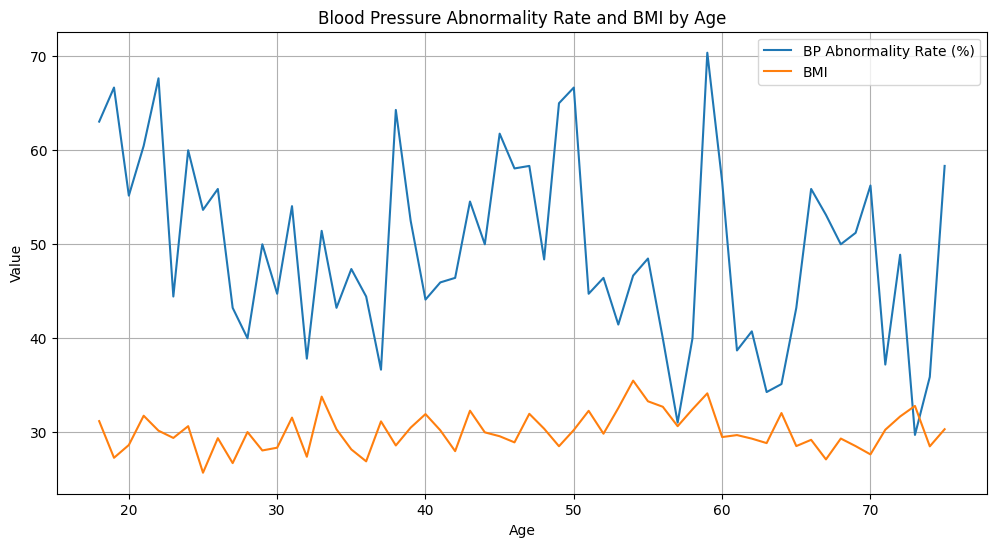

In [261]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 나이별 평균 계산
age_grouped = data.groupby('Age')[['Blood_Pressure_Abnormality', 'BMI']].mean().reset_index()

# Blood_Pressure_Abnormality를 퍼센트로 변환
age_grouped['Blood_Pressure_Abnormality'] = age_grouped['Blood_Pressure_Abnormality'] * 100

# 선 그래프 그리기
plt.figure(figsize=(12, 6))
sns.lineplot(x='Age', y='Blood_Pressure_Abnormality', data=age_grouped, label='BP Abnormality Rate (%)')
sns.lineplot(x='Age', y='BMI', data=age_grouped, label='BMI')

plt.title('Blood Pressure Abnormality Rate and BMI by Age')
plt.xlabel('Age')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


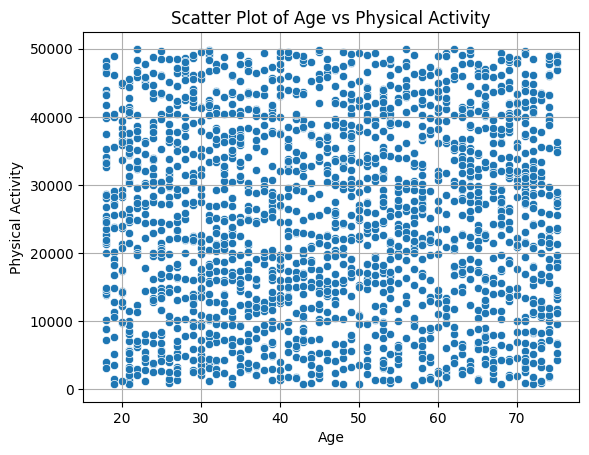

In [262]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x='Age', y='Physical_activity', data=data)

plt.title('Scatter Plot of Age vs Physical Activity')
plt.xlabel('Age')
plt.ylabel('Physical Activity')
plt.grid(True)
plt.show()


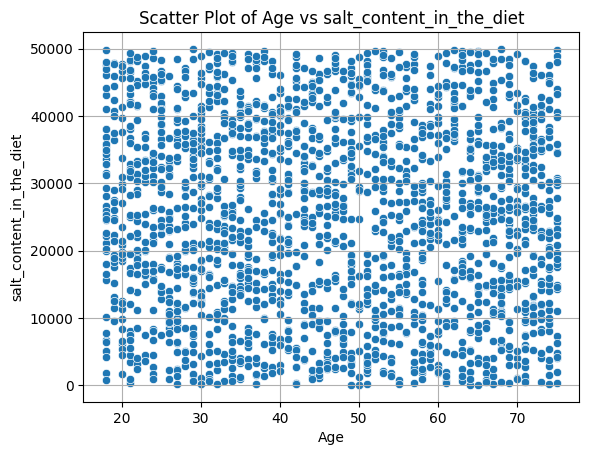

In [263]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x='Age', y='salt_content_in_the_diet', data=data)

plt.title('Scatter Plot of Age vs salt_content_in_the_diet')
plt.xlabel('Age')
plt.ylabel('salt_content_in_the_diet')
plt.grid(True)
plt.show()


In [264]:
# 클래스 분포 확인
data['Blood_Pressure_Abnormality'].value_counts()

,count
Blood_Pressure_Abnormality,
0,1013
1,987


In [265]:
# 데이터 정규화
scaler = StandardScaler()
X = scaler.fit_transform(X)

# 학습/테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [266]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape,

((1600, 13), (400, 13), (1600,), (400,))

In [267]:
# Tensor로 변환
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)
y_test = torch.tensor(y_test, dtype=torch.long)

In [268]:
# DataLoader 생성
train_dataset = TensorDataset(X_train, y_train)
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)

test_dataset = TensorDataset(X_test, y_test)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [269]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

(torch.Size([1600, 13]),
 torch.Size([400, 13]),
 torch.Size([1600]),
 torch.Size([400]))

### 모델 정의

In [270]:
class BP_Dense(nn.Module):
    def __init__(self):
        super(BP_Dense, self).__init__()
        self.fc1 = nn.Linear(13, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 32)
        self.fc5 = nn.Linear(32, 2)
        self.dropout = nn.Dropout(0.3)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout(x)
        x = torch.relu(self.fc3(x))
        x = self.dropout(x)
        x = torch.relu(self.fc4(x))
        x = self.fc5(x)
        return x

### 손실 함수 및 최적화 함수 정의

In [271]:
# 모델 초기화
from sklearn.utils.class_weight import compute_class_weight
model_dense = BP_Dense()
# 클래스 불균형 보정
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train.numpy()), y=y_train.numpy())
class_weights = torch.tensor(class_weights, dtype=torch.float32)

criterion = nn.CrossEntropyLoss(weight=class_weights)
optimizer = optim.Adam(model_dense.parameters(), lr=0.0005)

### 모델 학습

In [272]:
# 10. 학습
train_losses = []
test_accuracies = []
num_epochs = 200

for epoch in range(num_epochs):
    model_dense.train()
    running_loss = 0.0
    for inputs, labels in train_dataloader:
        optimizer.zero_grad()
        outputs = model_dense(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    train_losses.append(running_loss / len(train_dataloader))

    # 평가
    model_dense.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_dataloader:
            outputs = model_dense(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    test_accuracies.append(accuracy)

    print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {train_losses[-1]:.4f}, Accuracy: {accuracy:.2f}%")

print("Training complete.")

Epoch 1/200, Loss: 0.6727, Accuracy: 72.75%
Epoch 2/200, Loss: 0.5711, Accuracy: 73.00%
Epoch 3/200, Loss: 0.5339, Accuracy: 74.25%
Epoch 4/200, Loss: 0.5093, Accuracy: 74.00%
Epoch 5/200, Loss: 0.4783, Accuracy: 78.00%
Epoch 6/200, Loss: 0.4536, Accuracy: 80.25%
Epoch 7/200, Loss: 0.4321, Accuracy: 84.50%
Epoch 8/200, Loss: 0.4148, Accuracy: 86.75%
Epoch 9/200, Loss: 0.3685, Accuracy: 86.75%
Epoch 10/200, Loss: 0.3681, Accuracy: 87.50%
Epoch 11/200, Loss: 0.3651, Accuracy: 88.25%
Epoch 12/200, Loss: 0.3514, Accuracy: 88.75%
Epoch 13/200, Loss: 0.3417, Accuracy: 88.25%
Epoch 14/200, Loss: 0.3223, Accuracy: 88.00%
Epoch 15/200, Loss: 0.3287, Accuracy: 88.25%
Epoch 16/200, Loss: 0.3140, Accuracy: 88.75%
Epoch 17/200, Loss: 0.3237, Accuracy: 88.75%
Epoch 18/200, Loss: 0.3093, Accuracy: 88.25%
Epoch 19/200, Loss: 0.2980, Accuracy: 87.75%
Epoch 20/200, Loss: 0.3088, Accuracy: 88.75%
Epoch 21/200, Loss: 0.2844, Accuracy: 88.75%
Epoch 22/200, Loss: 0.2765, Accuracy: 89.00%
Epoch 23/200, Loss:

In [273]:
print(torch.isnan(X_train).sum())
print(torch.isnan(X_test).sum())
print(torch.isnan(y_train).sum())
print(torch.isnan(y_test).sum())

tensor(0)
tensor(0)
tensor(0)
tensor(0)


In [274]:
# 11. 최종 Evaluation
model_dense.eval()
all_labels = []
all_predictions = []
with torch.no_grad():
    for inputs, labels in test_dataloader:
        outputs = model_dense(inputs)
        _, predicted = torch.max(outputs.data, 1)
        all_labels.extend(labels.cpu().numpy())
        all_predictions.extend(predicted.cpu().numpy())

all_labels = np.array(all_labels)
all_predictions = np.array(all_predictions)

# 성능 지표 계산
conf_matrix = confusion_matrix(all_labels, all_predictions)
f1 = f1_score(all_labels, all_predictions, average='weighted')
precision = precision_score(all_labels, all_predictions, average='weighted')
recall = recall_score(all_labels, all_predictions, average='weighted')

# specificity 계산
specificity = []
for i in range(conf_matrix.shape[0]):
    tn = conf_matrix.sum() - (conf_matrix[i, :].sum() + conf_matrix[:, i].sum() - conf_matrix[i, i])
    fp = conf_matrix[:, i].sum() - conf_matrix[i, i]
    specificity.append(tn / (tn + fp))

print(f'\nConfusion Matrix:\n{conf_matrix}')
print(f'F1 Score: {f1:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'Specificity: {np.mean(specificity):.2f}')


Confusion Matrix:
[[175  33]
 [ 29 163]]
F1 Score: 0.85
Precision: 0.85
Recall: 0.84
Specificity: 0.85


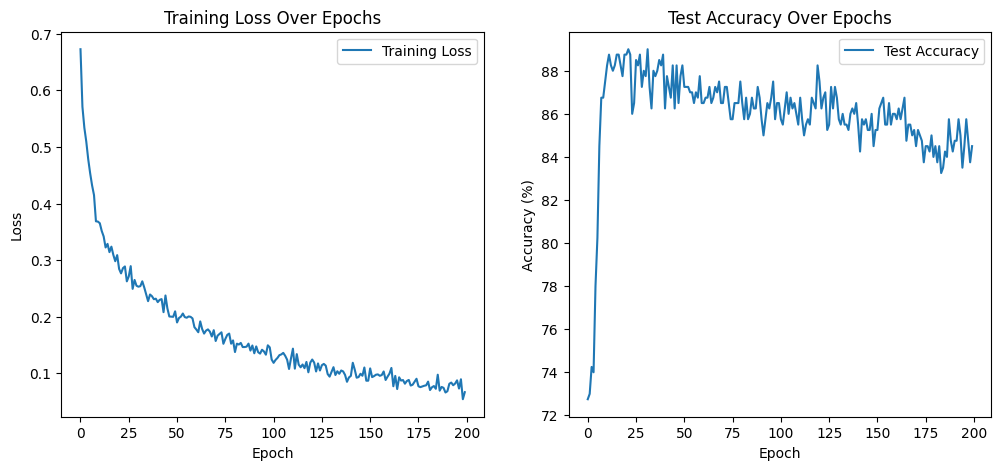

In [275]:
# 12. 학습 곡선 시각화
plt.figure(figsize=(12, 5))

# Loss 그래프
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()

# Accuracy 그래프
plt.subplot(1, 2, 2)
plt.plot(test_accuracies, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Test Accuracy Over Epochs')
plt.legend()

plt.show()

In [276]:
# 데이터와 타겟 분리
X = data.drop(['Patient_Number', 'Blood_Pressure_Abnormality'], axis=1).values
y = data['Blood_Pressure_Abnormality'].values

In [277]:
# 스케일링
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [278]:
# 학습/테스트 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [279]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape,

((1600, 13), (1600,), (400, 13), (400,))

In [280]:
# Convert to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.int64)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.int64)

# Create DataLoader
train_dataset = TensorDataset(X_train, y_train)
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)

test_dataset = TensorDataset(X_test, y_test)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [281]:
# Define the 1D CNN model
class DiabetesCNN(nn.Module):
    def __init__(self):
        super(DiabetesCNN, self).__init__()
        self.conv1 = nn.Conv1d(1, 16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv1d(16, 32, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(32 * 13, 64)  # Adjust the linear layer input size accordingly
        self.fc2 = nn.Linear(64, 2)

    def forward(self, x):
        x = x.unsqueeze(1)
        x = torch.relu(self.conv1(x))
        x = torch.relu(self.conv2(x))
        x = x.view(x.size(0), -1)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [282]:
# Initialize the model, loss function, and optimizer
model = DiabetesCNN()
summary(model, input_size=(13,))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv1d-1               [-1, 16, 13]              64
            Conv1d-2               [-1, 32, 13]           1,568
            Linear-3                   [-1, 64]          26,688
            Linear-4                    [-1, 2]             130
Total params: 28,450
Trainable params: 28,450
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (MB): 0.11
Estimated Total Size (MB): 0.11
----------------------------------------------------------------


In [283]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Variables to store loss and accuracy
train_losses = []
test_accuracies = []

In [284]:
# Training loop
num_epochs = 20
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_dataloader:
        optimizer.zero_grad()

        # Forward pass (permute 없이 바로)
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backward pass and optimize
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    train_losses.append(running_loss / len(train_dataloader))

    # Evaluate on test data
    model.eval()
    correct = 0
    total = 0
    all_labels = []
    all_predictions = []
    with torch.no_grad():
        for inputs, labels in test_dataloader:
            outputs = model(inputs)  # permute 없이 바로
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            all_labels.extend(labels.cpu().numpy())
            all_predictions.extend(predicted.cpu().numpy())

    accuracy = 100 * correct / total
    test_accuracies.append(accuracy)
    print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {train_losses[-1]:.4f}, Accuracy: {accuracy:.2f}%")

print("Training complete.")

# Convert lists to numpy arrays
all_labels = np.array(all_labels)
all_predictions = np.array(all_predictions)

# Calculate metrics
conf_matrix = confusion_matrix(all_labels, all_predictions)
f1 = f1_score(all_labels, all_predictions, average='weighted')
precision = precision_score(all_labels, all_predictions, average='weighted')
recall = recall_score(all_labels, all_predictions, average='weighted')

# Calculate specificity for each class
specificity = []
for i in range(conf_matrix.shape[0]):
    tn = conf_matrix.sum() - (conf_matrix[i, :].sum() + conf_matrix[:, i].sum() - conf_matrix[i, i])
    fp = conf_matrix[:, i].sum() - conf_matrix[i, i]
    specificity.append(tn / (tn + fp))

# Print metrics
print(f'\nConfusion Matrix:\n{conf_matrix}')
print(f'F1 Score: {f1:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'Specificity: {np.mean(specificity):.2f}')

Epoch 1/20, Loss: 0.5909, Accuracy: 78.25%
Epoch 2/20, Loss: 0.4474, Accuracy: 81.25%
Epoch 3/20, Loss: 0.3842, Accuracy: 88.00%
Epoch 4/20, Loss: 0.3406, Accuracy: 88.75%
Epoch 5/20, Loss: 0.3288, Accuracy: 90.00%
Epoch 6/20, Loss: 0.3078, Accuracy: 89.75%
Epoch 7/20, Loss: 0.2974, Accuracy: 90.25%
Epoch 8/20, Loss: 0.2986, Accuracy: 89.25%
Epoch 9/20, Loss: 0.2956, Accuracy: 89.75%
Epoch 10/20, Loss: 0.2900, Accuracy: 89.50%
Epoch 11/20, Loss: 0.2770, Accuracy: 91.25%
Epoch 12/20, Loss: 0.2750, Accuracy: 90.25%
Epoch 13/20, Loss: 0.2721, Accuracy: 91.00%
Epoch 14/20, Loss: 0.2762, Accuracy: 89.25%
Epoch 15/20, Loss: 0.2645, Accuracy: 89.50%
Epoch 16/20, Loss: 0.2673, Accuracy: 90.25%
Epoch 17/20, Loss: 0.2575, Accuracy: 90.50%
Epoch 18/20, Loss: 0.2615, Accuracy: 89.50%
Epoch 19/20, Loss: 0.2546, Accuracy: 89.25%
Epoch 20/20, Loss: 0.2464, Accuracy: 89.25%
Training complete.

Confusion Matrix:
[[188  20]
 [ 23 169]]
F1 Score: 0.89
Precision: 0.89
Recall: 0.89
Specificity: 0.89


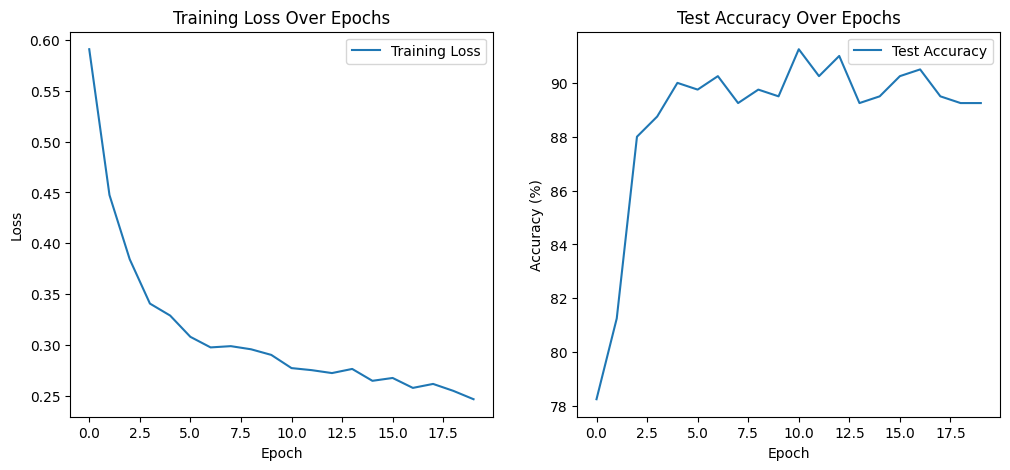

In [285]:
# Plot the loss and accuracy
plt.figure(figsize=(12, 5))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(test_accuracies, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Test Accuracy Over Epochs')
plt.legend()

plt.show()